In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
acute_cost = pd.read_csv("data/Motor accident acute care cost.csv")

In [4]:
acute_cost.head()

,Duration,Frequency,Percentage,Total Cost,Average Cost
0,1-10,427,84.20000,1356912,3177
1,11-20,60,11.80000,553742,9229
2,21-30,12,2.40000,174290,14524
3,31-40,4,0.80000,77384,19346
4,41-50,2,0.40000,62310,31155


In [5]:
total_average_cost = acute_cost["Total Cost"].sum() / acute_cost["Frequency"].sum()
total_average_cost

np.float64(4518.031558185405)

In [6]:
vehicles = pd.read_csv("data/Vehicles involved.csv", index_col="Year")

In [7]:
vehicles.shape

(10, 8)

In [8]:
vehicles = vehicles.sort_index(axis=1)

In [9]:
vehicles

,Bicycle,Bus,Car,Four-Wheel Drive,Lorry,Motorcycle,Others,Van
Year,,,,,,,,
2002,3278,9256,320649,14783,37794,86779,10043,19077
2003,2993,9673,351832,16429,42753,95545,9500,20277
2004,2963,9265,388589,18306,45420,99227,11186,20086
2005,2751,8594,376061,19106,42062,97072,9362,19085
2006,2834,9700,411444,20885,44767,104107,12266,20428
2007,2690,10285,426941,21823,47696,111765,14909,21109
2008,2463,9356,435665,22793,48250,111819,11571,20392
2009,2486,9380,472307,23581,46724,113962,9294,19220
2010,2178,9580,511861,25777,50438,120156,11756,18788


In [10]:
total_vehicles = vehicles.sum(axis=1)
vehicles_proportion = vehicles.div(total_vehicles, axis='index')

In [11]:
vehicles_proportion

,Bicycle,Bus,Car,Four-Wheel Drive,Lorry,Motorcycle,Others,Van
Year,,,,,,,,
2002,0.00653,0.01845,0.63918,0.02947,0.07534,0.17298,0.02002,0.03803
2003,0.00545,0.01762,0.64086,0.02993,0.07787,0.17403,0.01730,0.03693
2004,0.00498,0.01557,0.65304,0.03076,0.07633,0.16676,0.01880,0.03376
2005,0.00479,0.01497,0.65505,0.03328,0.07327,0.16909,0.01631,0.03324
2006,0.00452,0.01548,0.65681,0.03334,0.07146,0.16619,0.01958,0.03261
2007,0.00409,0.01565,0.64962,0.03321,0.07257,0.17006,0.02269,0.03212
2008,0.00372,0.01413,0.65780,0.03441,0.07285,0.16883,0.01747,0.03079
2009,0.00357,0.01346,0.67767,0.03383,0.06704,0.16351,0.01334,0.02758
2010,0.00290,0.01276,0.68200,0.03434,0.06720,0.16009,0.01566,0.02503


In [12]:
vehicles_trimmed = vehicles_proportion.copy()
vehicles_trimmed["Automobile"] = vehicles_trimmed["Bus"] + vehicles_trimmed["Car"] + vehicles_trimmed["Four-Wheel Drive"] + vehicles_trimmed["Lorry"] + vehicles_trimmed["Van"]
vehicles_trimmed["Other"] = vehicles_trimmed["Bicycle"] + vehicles_trimmed["Others"]
vehicles_trimmed = vehicles_trimmed[["Automobile", "Motorcycle", "Other"]]
vehicles_trimmed = vehicles_trimmed * 100

In [13]:
def plot_proportions(data):
    data = data.round(1)
    years = data.index
    categories = data.columns
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for colname, color in zip(categories, category_colors):
        widths = data[colname]
        starts = data_cum[colname] - widths
        rects = ax.barh(years, widths, left=starts, height=0.5, label=colname, color=color)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(categories), bbox_to_anchor=(0, -.1), loc='lower left', fontsize='small')
    return fig, ax


In [69]:
vehicles_trimmed

,Automobile,Motorcycle,Other
Year,,,
2002,80.04621,17.29840,2.65539
2003,80.32102,17.40340,2.27558
2004,80.94656,16.67563,2.37782
2005,80.98130,16.90876,2.10994
2006,80.97045,16.61907,2.41048
2007,80.31642,17.00577,2.67780
2008,80.99784,16.88321,2.11895
2009,81.95835,16.35144,1.69021
2010,82.13405,16.00940,1.85654


In [68]:
sem(vehicles_trimmed, axis=0)

array([0.22435788, 0.15294473, 0.0997896 ])

In [70]:
vehicles_trimmed.mean()

Automobile   81.03779
Motorcycle   16.71631
Other         2.24591
dtype: float64

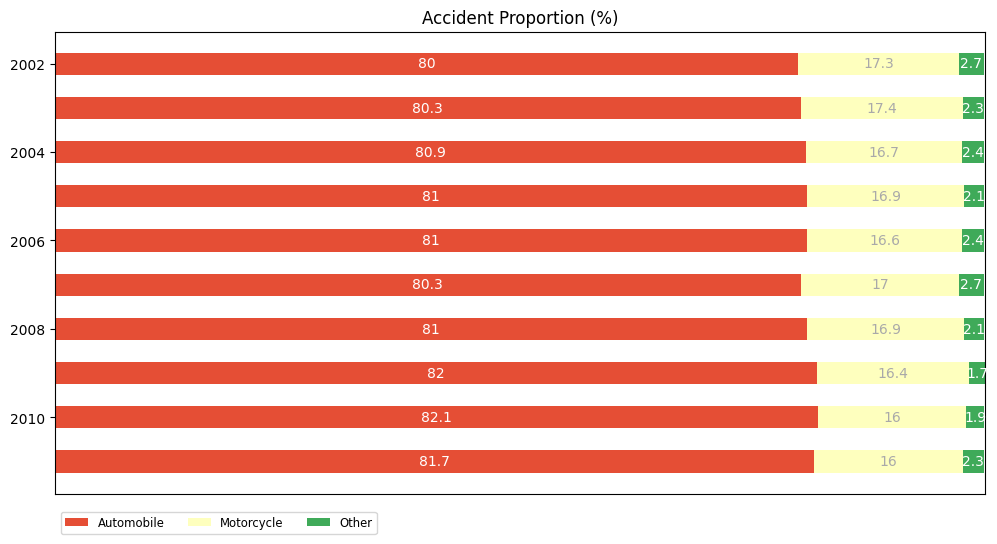

In [15]:
fig, ax = plot_proportions(vehicles_trimmed)
plt.title("Accident Proportion (%)")
plt.show()

In [16]:
accidents = pd.read_csv("data/Total accidents.csv", index_col="Year")
accidents = accidents.drop(labels=[2017])

In [17]:
accidents = accidents.replace(',','',regex=True)
c = accidents.select_dtypes(object).columns
accidents[c] = accidents[c].apply(pd.to_numeric, errors='coerce')

In [18]:
accidents["Casualties"] = accidents["Road Deaths"] + accidents["Serious Injury"] + accidents["Slight Injury"]
accidents["casualties_per_crash"] = accidents["Casualties"] / accidents["Road Crashes"]
accidents["casualties_per_fatality"] = accidents["Casualties"] / accidents["Road Deaths"]
accidents["deaths_per_100_accident"] = (accidents["Road Deaths"] / accidents["Road Crashes"]) * 100

In [19]:
accidents

,Registered Vehicles,Population,Road Crashes,Road Deaths,Serious Injury,Slight Injury,"Index per 10,000 Vehicles","Index per 100,000 Population",Index per billion VKT,Casualties,casualties_per_crash,casualties_per_fatality,deaths_per_100_accident
Year,,,,,,,,,,,,,
1997,8550469,21769300,215632,6302,14105,36167,7.37000,28.95000,33.57000,56574,0.26236,8.97715,2.92257
1998,9141357,22333500,211037,5740,12068,37896,6.28000,25.70000,28.75000,55704,0.26395,9.70453,2.71990
1999,9929951,22909500,223166,5794,10366,36777,5.83000,25.29000,26.79000,52937,0.23721,9.13652,2.59627
2000,10598804,23494900,250429,6035,9790,34375,5.69000,25.69000,26.25000,50200,0.20046,8.31814,2.40986
2001,11302545,24030500,265175,5849,8680,35944,5.17000,24.34000,23.93000,50473,0.19034,8.62934,2.20571
2002,12068144,24542500,279711,5891,8425,35236,4.88000,24.00000,22.71000,49552,0.17715,8.41148,2.10610
2003,12819248,25038100,298653,6286,9040,37415,4.90000,25.11000,22.77000,52741,0.17660,8.39023,2.10478
2004,13764837,25541500,326815,6228,9218,38645,4.52000,24.38000,21.10000,54091,0.16551,8.68513,1.90567
2005,14733585,26045500,328264,6200,9395,31417,4.21000,23.80000,19.58000,47012,0.14321,7.58258,1.88872


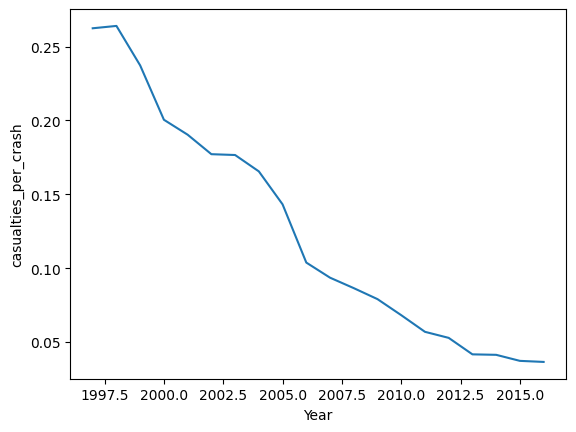

In [20]:
_ = sns.lineplot(data=accidents, x=accidents.index, y="casualties_per_crash")

In [21]:
fatalities = pd.read_csv("data/Motor Fatalities.csv", index_col="Year")

In [22]:
fatalities

,Bicycle,Bus,Car,Four-Wheel Drive,Lorry,Motorcycle,Others,Pedestrian,Van
Year,,,,,,,,,
2012,157,31,1440,169,190,4200,149,552,82
2013,159,60,1400,168,210,4300,100,455,80
2014,124,29,1260,129,220,4200,149,530,74
2015,108,20,1360,130,223,4210,113,480,73
2016,123,29,1490,143,182,4500,122,525,63
2017,162,24,1270,114,198,4350,124,440,62
2018,122,39,1170,89,195,4130,90,410,48
2019,108,27,1250,82,180,3950,110,390,53


In [23]:
total_fatalities = fatalities.sum(axis=1)

In [24]:
fatalities_proportion = fatalities.div(total_fatalities, axis='index')

In [25]:
fatalities_proportion

,Bicycle,Bus,Car,Four-Wheel Drive,Lorry,Motorcycle,Others,Pedestrian,Van
Year,,,,,,,,,
2012,0.02253,0.00445,0.20660,0.02425,0.02726,0.60258,0.02138,0.07920,0.01176
2013,0.02294,0.00866,0.20196,0.02424,0.03029,0.62031,0.01443,0.06564,0.01154
2014,0.01847,0.00432,0.18764,0.01921,0.03276,0.62547,0.02219,0.07893,0.01102
2015,0.01608,0.00298,0.20247,0.01935,0.03320,0.62677,0.01682,0.07146,0.01087
2016,0.01714,0.00404,0.20761,0.01992,0.02536,0.62700,0.01700,0.07315,0.00878
2017,0.02402,0.00356,0.18832,0.01690,0.02936,0.64502,0.01839,0.06524,0.00919
2018,0.01939,0.00620,0.18592,0.01414,0.03099,0.65628,0.01430,0.06515,0.00763
2019,0.01756,0.00439,0.20325,0.01333,0.02927,0.64228,0.01789,0.06341,0.00862


In [26]:
fatalities_proportion.mean()

Bicycle            0.01976
Bus                0.00482
Car                0.19797
Four-Wheel Drive   0.01892
Lorry              0.02981
Motorcycle         0.63071
Others             0.01780
Pedestrian         0.07027
Van                0.00993
dtype: float64

In [27]:
fatalities_trimmed = fatalities_proportion.copy()
fatalities_trimmed["Automobile"] = fatalities_trimmed["Bus"] + fatalities_trimmed["Car"] + fatalities_trimmed["Four-Wheel Drive"] + fatalities_trimmed["Lorry"] + fatalities_trimmed["Van"]
fatalities_trimmed["Other"] = fatalities_trimmed["Bicycle"] + fatalities_trimmed["Others"] + fatalities_trimmed["Pedestrian"]
fatalities_trimmed = fatalities_trimmed[["Automobile", "Motorcycle", "Other"]]
fatalities_trimmed = fatalities_trimmed * 100


In [28]:
fatalities_trimmed = fatalities_trimmed.round(1)

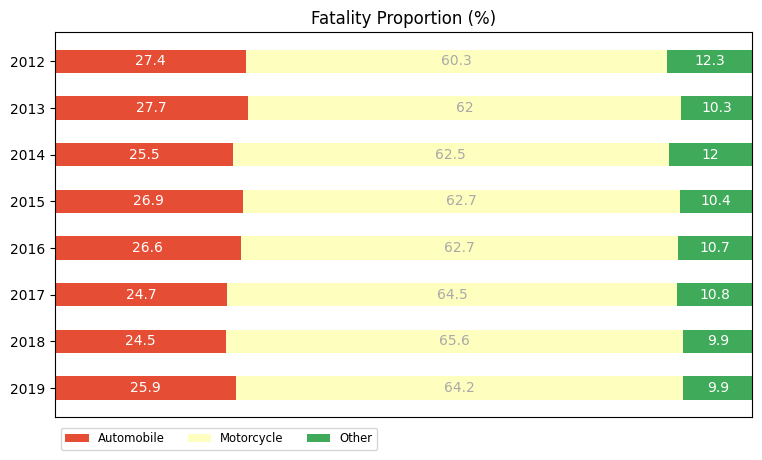

In [29]:
years = fatalities_trimmed.index
categories = fatalities_trimmed.columns
data_cum = fatalities_trimmed.cumsum(axis=1)
category_colors = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, fatalities_trimmed.shape[1]))
fig, ax = plt.subplots(figsize=(9, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(fatalities_trimmed, axis=1).max())

for colname, color in zip(categories, category_colors):
    widths = fatalities_trimmed[colname]
    starts = data_cum[colname] - widths
    rects = ax.barh(years, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(categories), bbox_to_anchor=(0, -.1), loc='lower left', fontsize='small')

plt.title("Fatality Proportion (%)")
plt.show()


In [71]:
fatalities_trimmed.mean()

Automobile   26.15000
Motorcycle   63.06250
Other        10.78750
dtype: float64

In [72]:
sem(fatalities_trimmed)

array([0.42342144, 0.58460533, 0.31984232])

Assume fatality proportion is the same as overall casualty proportion

In [30]:
dot_product = np.dot(accidents["Casualties"].to_numpy().reshape(-1,1), fatalities_proportion.mean().to_numpy().reshape(1,9))
casualty_vehicle_type = pd.DataFrame(dot_product, columns=fatalities_proportion.columns, index=accidents.index)

In [31]:
casualty_vehicle_type

,Bicycle,Bus,Car,Four-Wheel Drive,Lorry,Motorcycle,Others,Pedestrian,Van
Year,,,,,,,,,
1997,1118.14244,272.87311,11200.01599,1070.32003,1686.53535,35681.99458,1006.93617,3975.61294,561.56940
1998,1100.94755,268.67685,11027.78115,1053.86055,1660.59966,35133.27369,991.45142,3914.47561,552.93354
1999,1046.25988,255.33079,10479.99516,1001.51185,1578.11224,33388.08900,942.20278,3720.03080,525.46752
2000,992.16514,242.12943,9938.14831,949.73071,1496.51915,31661.82571,893.48810,3527.69416,498.29929
2001,997.56078,243.44619,9992.19442,954.89558,1504.65759,31834.01054,898.34711,3546.87864,501.00916
2002,979.35791,239.00393,9809.86305,937.47124,1477.20153,31253.12326,881.95463,3482.15739,491.86706
2003,1042.38609,254.38542,10441.19283,997.80374,1572.26925,33264.46912,938.71426,3706.25733,523.52197
2004,1069.06782,260.89687,10708.45379,1023.34430,1612.51429,34115.93256,962.74233,3801.12560,536.92244
2005,929.15672,226.75276,9307.01650,889.41714,1401.48124,29651.11056,836.74627,3303.66450,466.65430


In [32]:
casualty_vehicle_type["Automobile"] = casualty_vehicle_type["Bus"] + casualty_vehicle_type["Car"] + casualty_vehicle_type["Four-Wheel Drive"] + casualty_vehicle_type["Lorry"] + casualty_vehicle_type["Van"]
casualty_vehicle_type["Other"] = casualty_vehicle_type["Bicycle"] + casualty_vehicle_type["Others"] + casualty_vehicle_type["Pedestrian"]
casualty_vehicle_type = casualty_vehicle_type[["Automobile", "Motorcycle", "Other"]]

In [33]:
casualty_proportion = casualty_vehicle_type.div(casualty_vehicle_type.sum(axis=1), axis='index')

In [34]:
casualty_proportion

,Automobile,Motorcycle,Other
Year,,,
1997,0.26145,0.63071,0.10784
1998,0.26145,0.63071,0.10784
1999,0.26145,0.63071,0.10784
2000,0.26145,0.63071,0.10784
2001,0.26145,0.63071,0.10784
2002,0.26145,0.63071,0.10784
2003,0.26145,0.63071,0.10784
2004,0.26145,0.63071,0.10784
2005,0.26145,0.63071,0.10784


In [35]:
casualty_vehicle_type.loc[2008]

Automobile    8438.06102
Motorcycle   20355.65265
Other         3480.28633
Name: 2008, dtype: float64

In [36]:
casualty_2008 = accidents.loc[2008,"Casualties"]
total_cost_2008 = casualty_2008 * total_average_cost
total_cost_2008

np.float64(145814950.50887576)

In [37]:
automobile_and_motorcycle_cost_2008 = total_cost_2008 * (1 - casualty_proportion.loc[2008, "Other"])

In [38]:
casualty_vehicle_type.loc[2008].drop(index=["Other"])

Automobile    8438.06102
Motorcycle   20355.65265
Name: 2008, dtype: float64

In [39]:
cost_per_auto_2008 = automobile_and_motorcycle_cost_2008 / (casualty_vehicle_type.loc[2008, "Automobile"] + casualty_vehicle_type.loc[2008, "Motorcycle"] * 2)
cost_per_auto_2008

np.float64(2646.8481035470886)

In [40]:
cost_per_cycle_2008 = 2 * cost_per_auto_2008
cost_per_cycle_2008

np.float64(5293.696207094177)

In [41]:
(cost_per_auto_2008 * casualty_vehicle_type.loc[2008, "Automobile"]) + (cost_per_cycle_2008 * casualty_vehicle_type.loc[2008, "Motorcycle"])

np.float64(130090907.01791432)

In [42]:
automobile_and_motorcycle_cost_2008

np.float64(130090907.01791432)

In [43]:
inflation = pd.read_csv("data/Medical cost inflation.csv", index_col="Year")
inflation

,Inflation Rate
Year,
2009,8.90000
2010,9.75000
2011,10.00000
2012,10.10000
2013,11.00000
2014,11.00000
2015,12.00000
2016,14.00000
2017,15.00000


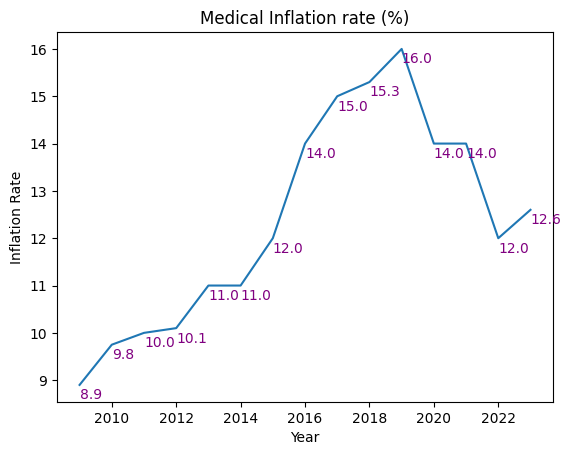

In [44]:
ax = sns.lineplot(inflation["Inflation Rate"])
ax.set_title("Medical Inflation rate (%)")

# label points on plot
for x, y in zip(inflation.index, inflation["Inflation Rate"]):
    plt.text(x=x,
             y=y-0.3,
             s='{:.1f}'.format(y),
             color='purple')

In [45]:
inflation["Inflation Rate"] = inflation["Inflation Rate"] / 100 + 1

In [46]:
total_inflation = np.prod(inflation.loc[:2022], axis=0).iloc[0]
total_inflation

np.float64(5.09793280253751)

In [47]:
cost_per_cycle_2022 = cost_per_cycle_2008 * total_inflation
cost_per_auto_2022 = cost_per_auto_2008 * total_inflation

In [48]:
cost_per_auto_2022

np.float64(13493.453770406904)

In [49]:
cost_per_cycle_2022

np.float64(26986.90754081381)

In [50]:
total_casualties_2022 = 34036


In [73]:
casualty_proportion.iloc[0]["Motorcycle"]

np.float64(0.6307136595470321)

In [51]:
motorcycle_casualties = casualty_proportion.iloc[0]["Motorcycle"] * total_casualties_2022
motorcycle_casualties

np.float64(21466.97011634278)

In [75]:
casualty_proportion.iloc[0]["Motorcycle"]

np.float64(0.6307136595470321)

In [78]:
(casualty_proportion.iloc[0]["Motorcycle"] - (sem(fatalities_trimmed)[1]/100)) * total_casualties_2022

np.float64(21267.993845934998)

In [80]:
(sem(fatalities_trimmed)[1]/100) * total_casualties_2022

np.float64(198.97627040778715)

In [52]:
automobile_casualties = casualty_proportion.iloc[0]["Automobile"] * total_casualties_2022
automobile_casualties

np.float64(8898.737212085198)

In [81]:
(sem(fatalities_trimmed)[0]/100) * total_casualties_2022

np.float64(144.11572068901532)

In [53]:
other_casualties = casualty_proportion.iloc[0]["Other"] * total_casualties_2022
other_casualties

np.float64(3670.2926715720196)

In [54]:
motorcycle_cost = motorcycle_casualties * cost_per_cycle_2022
motorcycle_cost

np.float64(579327137.7111557)

In [55]:
automobile_cost = automobile_casualties * cost_per_auto_2022
automobile_cost

np.float64(120074699.18627124)

In [56]:
ceh_public_2022 = 35485889929.6

In [57]:
motorcycle_cost / ceh_public_2022

np.float64(0.01632556317061444)

In [58]:
active_motorcycles = (16773112 / 36 * 24)
active_motorcycles

11182074.666666666

In [59]:
active_auto = (17244978 + 1429403) / 36 * 24
active_auto

12449587.333333334

In [60]:
motorcycle_cost / active_motorcycles

np.float64(51.80855565542837)

In [61]:
motorcycle_cost / active_motorcycles * 12

np.float64(621.7026678651405)

In [62]:
automobile_cost / active_auto

np.float64(9.644873839695508)

In [63]:
automobile_cost / active_auto * 12

np.float64(115.7384860763461)

In [64]:
motorcycle_casualties / active_motorcycles

np.float64(0.0019197663006432066)

In [65]:
automobile_casualties / active_auto

np.float64(0.0007147817010977657)

In [66]:
620/4000

0.155